In [3]:
import pandas as pd
from genderize import Genderize
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
%matplotlib inline
import re

## Read CSV and data cleaning

In [4]:
df=pd.read_csv('salary2.csv',names= ["name", "Agency", "Total Pay", "Title","Rate_of_Pay","Year","Basis","Branch"])


In [5]:
df['firstname']=df['name'].apply(lambda x: x.split(',')[0])
df['lastname']=df['name'].apply(lambda x:x.split(',')[1])

In [6]:
df

,name,Agency,Total Pay,Title,Rate_of_Pay,Year,Basis,Branch,firstname,lastname
0,"Johnson, Candace",Roswell Park Cancer Institute Corporation,"$1,187,506",President & Ceo,"$867,000",2018,Annual,Public Authorities,Johnson,Candace
1,"Mohler, James",Roswell Park Cancer Institute Corporation,"$880,459","Sr Vice President, Translational Research, Cha...","$664,143",2018,Annual,Public Authorities,Mohler,James
2,"Odunsi, Adekunle",Roswell Park Cancer Institute Corporation,"$878,853","Deputy Director, Chair, Gynecological Oncology...","$809,266",2018,Annual,Public Authorities,Odunsi,Adekunle
3,"Fenstermaker, Robert",Roswell Park Cancer Institute Corporation,"$841,928","Chair, Neuro Oncology","$844,126",2018,Annual,Public Authorities,Fenstermaker,Robert
4,"Kuettel, Michael",Roswell Park Cancer Institute Corporation,"$792,345","Chair, Radiation Medicine","$765,551",2018,Annual,Public Authorities,Kuettel,Michael
5,"Filadora, Victor",Roswell Park Cancer Institute Corporation,"$791,795",Chief Of Clinical Services,"$637,727",2018,Annual,Public Authorities,Filadora,Victor
6,"Kuvshinoff, Boris",Roswell Park Cancer Institute Corporation,"$764,816",Chief Medical Officer,"$634,358",2018,Annual,Public Authorities,Kuvshinoff,Boris
7,"Schwaab, Thomas",Roswell Park Cancer Institute Corporation,"$756,611","Chief Of Strategy, Business Development And Ou...","$618,966",2018,Annual,Public Authorities,Schwaab,Thomas
8,"Yendamuri, Saikrishna",Roswell Park Cancer Institute Corporation,"$743,020",Chair,"$701,226",2018,Annual,Public Authorities,Yendamuri,Saikrishna
9,"Ernstoff, Marc",Roswell Park Cancer Institute Corporation,"$741,326",Senior Vice President,"$615,742",2018,Annual,Public Authorities,Ernstoff,Marc


In [7]:
df['lastname']= df['lastname'].apply(lambda x: x.split(' ')[1])

## Load the dataset from predict_gender.py 

- Call API to get predicted gender (predict_gender.py)
- Read the csv of predicted gender dataset

In [8]:

df_lastname=pd.read_csv('gender.csv')

df_lastname=df_lastname.iloc[:,1:]

In [9]:

df3= pd.merge(df, df_lastname, on='lastname').drop_duplicates()
df3=df3.reset_index(drop=True)


- check the column of gender with value returned 

In [10]:
len(df3[df3['gender'].notnull()])


7862

In [11]:
df_gender=df3[df3['gender'].notnull()].reset_index(drop=True)
df_gender=df_gender.replace('NDR','')

In [12]:
def formatter(df, colname, before, after):
    df[colname] = [x.replace(before,after) for x in df[colname]]

In [13]:
columns = ['Total Pay','Total Pay','Rate_of_Pay','Rate_of_Pay']
befores = ['$',',','$',',']
afters = ['','','','']

for col, bef, aft in zip(columns, befores, afters):
    formatter(df_gender, col, bef, aft)

In [14]:
df_gender['Total Pay']=pd.to_numeric(df_gender['Total Pay'], downcast='float')
df_gender['Rate_of_Pay']=pd.to_numeric(df_gender['Rate_of_Pay'],downcast='float')

- only extract the data with name prediction probability >90%

In [15]:
df_gender=df_gender.loc[df_gender['probability']>0.9]
len(df_gender)

7609

In [16]:
len(df_gender.loc[df_gender['gender']=='male'])

6463

- Break down the title categories

In [17]:
df_gender['Title']=[x.lower() for x in df_gender['Title']]

df_gender['Assistant']=[1 if (re.search('^ass', x) != None) else 0 for x in df_gender['Title']]
df_gender['Captain']=[1 if (re.search('^cap',x)!=None) else 0 for x in df_gender['Title']]
df_gender['Chief']=[1 if (re.search('^chi',x)!=None)else 0 for x in df_gender['Title']]
df_gender['Administrative']=[1 if (re.search('^ad',x)!=None) else 0 for x in df_gender['Title']]

In [18]:
group=df_gender.groupby('gender')
group['Total Pay'].mean()

gender
female    212736.203125
male      213496.625000
Name: Total Pay, dtype: float32

## Comparison for average salary for both male and female 

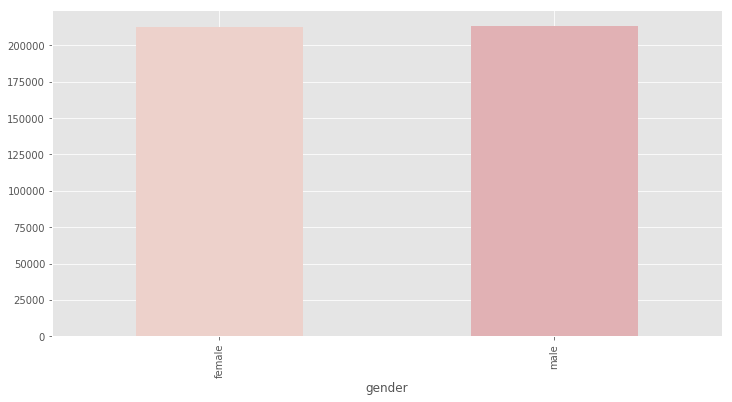

In [19]:
with sns.cubehelix_palette(8):
    plt.figure(figsize=(12,6))
    group['Total Pay'].mean().plot.bar()

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


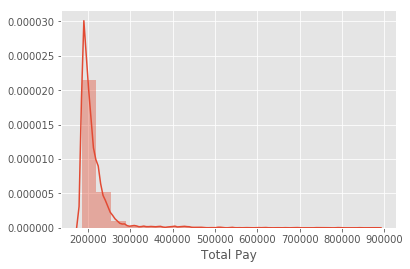

In [20]:
Malepay=df_gender.loc[df_gender['gender']=='male'].sort_values('Total Pay',ascending=False)
sns.distplot(Malepay['Total Pay'],bins=20)

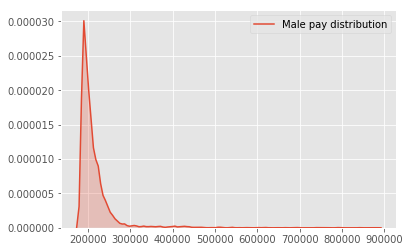

In [21]:
sns.kdeplot(Malepay['Total Pay'], shade=True, label='Male pay distribution')

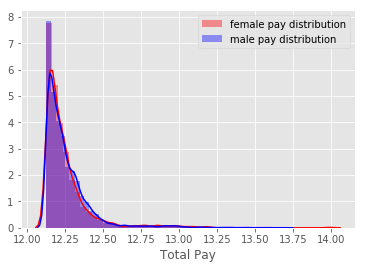

In [22]:
Femalepay=df_gender.loc[df_gender['gender']=='female'].sort_values('Total Pay',ascending=False)
Femalepay['Total Pay']=np.log(Femalepay['Total Pay'])
Malepay['Total Pay']=np.log(Malepay['Total Pay'])
sns.distplot(Femalepay['Total Pay'], color='red', label='female pay distribution')
sns.distplot(Malepay['Total Pay'],color='blue',label='male pay distribution')
plt.legend()
plt.savefig("output.png")

- Generally, female and male pay distribution overlaps and there is no major difference in salary for male and female working professionals

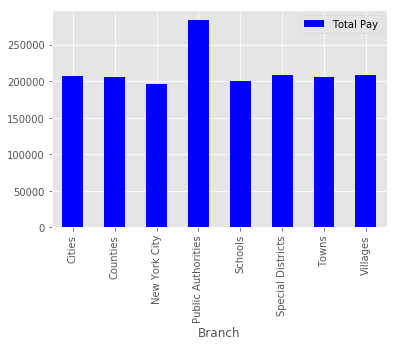

In [23]:
df_gender[['Branch','Total Pay']].groupby('Branch').median().plot.bar(color='b')

## Gender salary difference for different branch

In [24]:
df_gender.sort_values('Total Pay',ascending=False)
df_outliers=df_gender.loc[df_gender['Total Pay']<900000]

<Figure size 504x720 with 0 Axes>

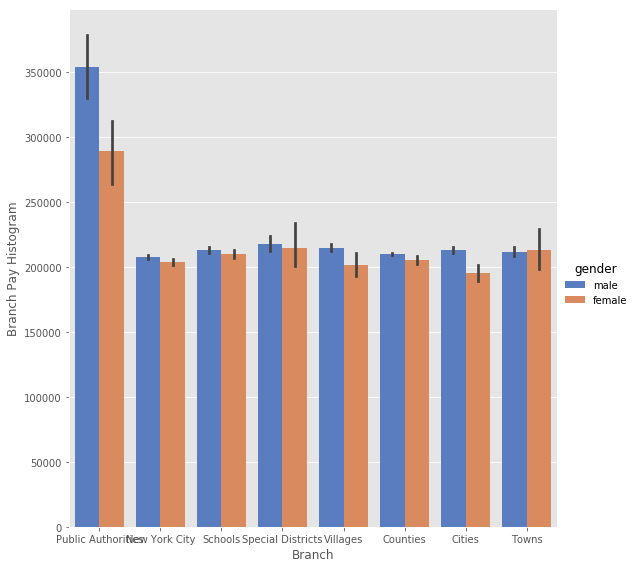

In [25]:
plt.figure(figsize = (7,10))
g=sns.catplot(x="Branch", y="Total Pay", hue="gender", data=df_outliers,
                height=8, kind="bar", palette="muted")
g.set_ylabels("Branch Pay Histogram")


- Among all braches, there is an obvious gender gap in salary in Public authorities

In [26]:
df_PA=df_outliers.loc[df_outliers['Branch']=='Public Authorities']

df_PA['Agency']=[x.replace('Roswell Park Cancer Institute Corporation','Cancer Institute')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Niagara Frontier Transportation Authority','Niagara Transportation')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Development Authority of the North Country','Development')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Municipal Authorities','Municipal')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Rochester-Genesee Regional Transportation Authority','Rochester')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Urban Development Corporation','Urban Development')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Central New York Regional Transportation Authority','Central NY Trans')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Energy Research and Development Authority','Energy')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Hudson River Park Trust','Park Trust')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Affordable Housing Corporation','Housing')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Dormitory Authority','Dormitory')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Housing Trust Fund Corporation','Housing')for x in df_PA['Agency']]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

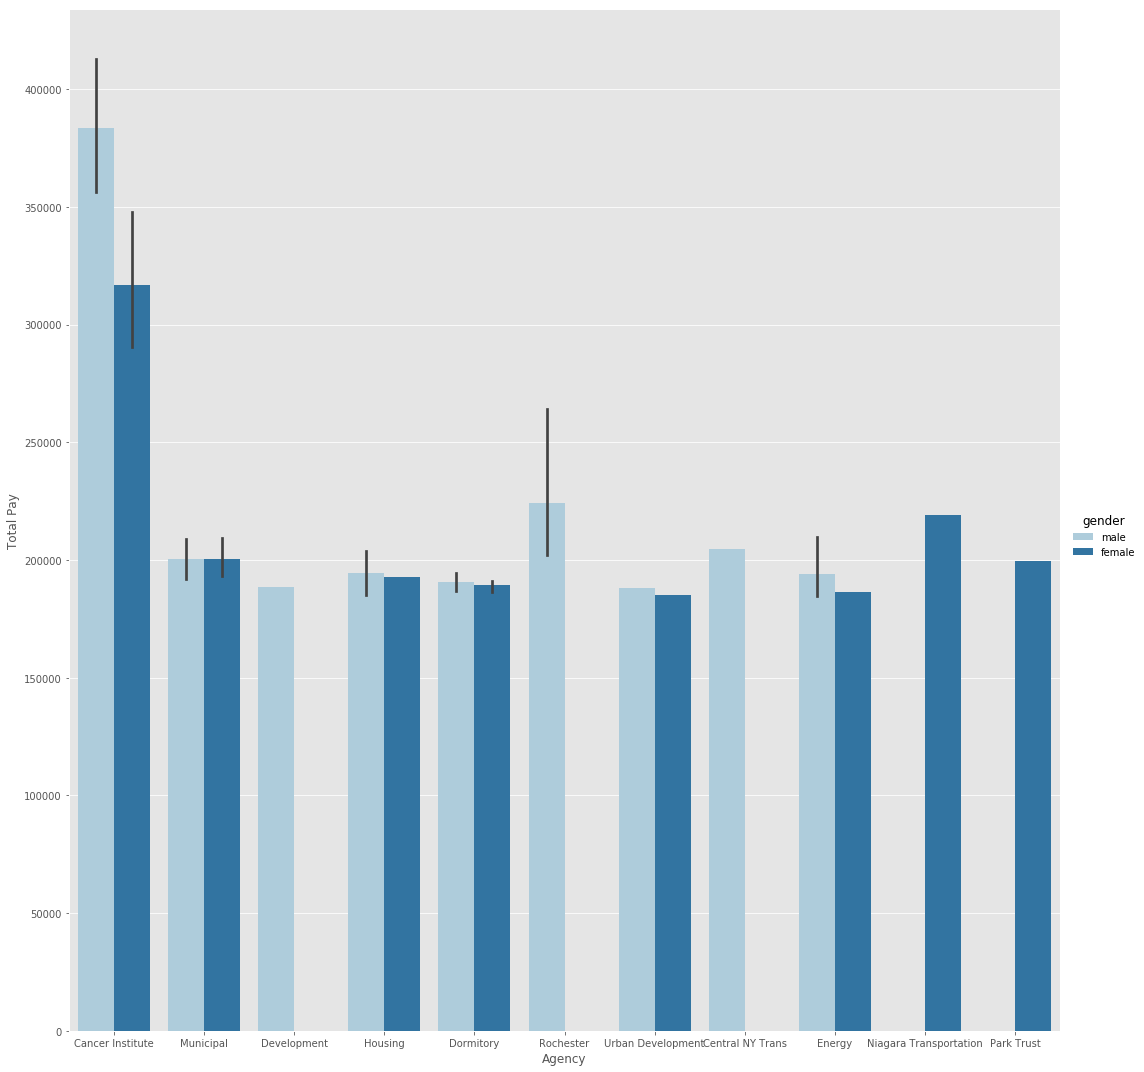

In [27]:
g=sns.catplot(x="Agency", y="Total Pay", hue="gender", data=df_PA,
                height=15, kind="bar", palette="Paired")

- We observed a major gap within Cancer Institute and we further confirm the difference by running a t-test

In [28]:

df_female=df_PA[(df_PA['Agency'] =='Cancer Institue') & (df_PA['gender'] =='female' )]
df_male=df_PA[(df_PA['Agency'] =='Cancer Institue') & (df_PA['gender'] =='male' )]

In [29]:
import plotly 
plotly.tools.set_credentials_file(username='wanxin', api_key='IvSU1vYvCCEQ5iJO9gxT')

## T-test for salary gap in Roswell Park Cancer Institute

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy

twosample_results = scipy.stats.ttest_ind(df_female['Total Pay'], df_male['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~wanxin/0 or inside your plot.ly account where it is named 'twosample-table'


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



- With p-value < 0.01, there is a statistically significant difference between female and male's salary in Roswell Cancer Institue

## T-test for general average salary 

In [31]:
twosample_results = scipy.stats.ttest_ind(Femalepay['Total Pay'], Malepay['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-all')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Wordcloud to inspect job titles frequency for males and females

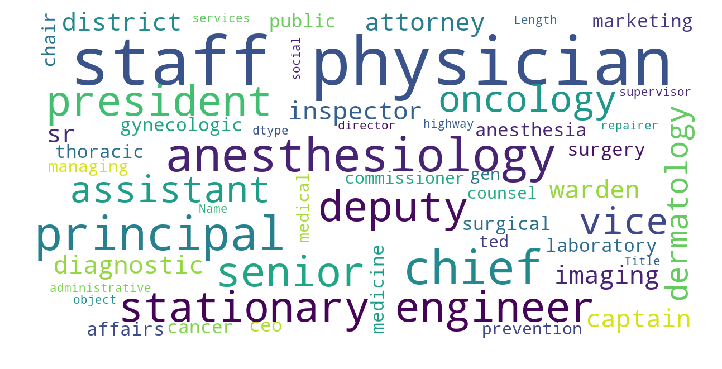

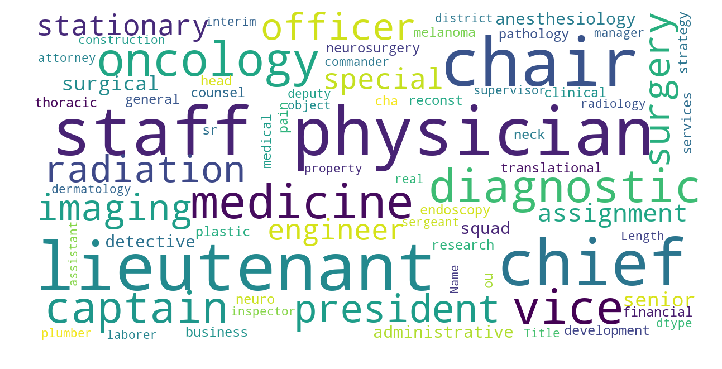

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Femalepay['Title'])
show_wordcloud(Malepay['Title'])

## T-test for salary for those whose job titles are captain

In [33]:
df_at_m=df_outliers[(df_outliers['Title']=='Captain')& (df_outliers['gender']=='male')]
df_at_f=df_outliers[(df_outliers['Title']=='Captain')& (df_outliers['gender']=='female')]



In [34]:
twosample_results = scipy.stats.ttest_ind(df_at_m['Total Pay'], df_at_f['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-principals')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Histogram for males and females with same job titles

In [35]:
df_gender['category']=['Assistant' if (re.search('^ass',x)!=None)else 'Chief' if (re.search('^chi',x)!=None) else 'Captain' if (re.search('^cap',x)!=None) else 'Administrative' if(re.search('^ad',x)!=None) else'St_physician'if(re.search('^staf',x)!=None) else'' for x in df_gender['Title']]

In [36]:
df_gender

,name,Agency,Total Pay,Title,Rate_of_Pay,Year,Basis,Branch,firstname,lastname,count,gender,probability,Assistant,Captain,Chief,Administrative,category
0,"Johnson, Candace",Roswell Park Cancer Institute Corporation,1187506.0,president & ceo,867000.0,2018,Annual,Public Authorities,Johnson,Candace,313.0,female,1.00,0,0,0,0,
1,"Mohler, James",Roswell Park Cancer Institute Corporation,880459.0,"sr vice president, translational research, cha...",664143.0,2018,Annual,Public Authorities,Mohler,James,6359.0,male,0.99,0,0,0,0,
2,"Daly, James L","Environment Protection, Department of",435048.0,stationary engineer,467.0,2018,Daily,New York City,Daly,James,6359.0,male,0.99,0,0,0,0,
3,"Kadavunkal, James","Environment Protection, Department of",403752.0,stationary engineer,467.0,2018,Daily,New York City,Kadavunkal,James,6359.0,male,0.99,0,0,0,0,
4,"Kaishian, James M",Briarcliff Manor Union Free Schools,288143.0,,NaN,2018,,Schools,Kaishian,James,6359.0,male,0.99,0,0,0,0,
5,"Bellezza, James M","Transportation, Department of",286396.0,crane operator ampes,505.0,2018,Daily,New York City,Bellezza,James,6359.0,male,0.99,0,0,0,0,
6,"Mccann, James T","Environment Protection, Department of",279126.0,stationary engineer,467.0,2018,Daily,New York City,Mccann,James,6359.0,male,0.99,0,0,0,0,
7,"Salerno, James",Police & Fire,273695.0,,NaN,2018,,Special Districts,Salerno,James,6359.0,male,0.99,0,0,0,0,
8,"Dillon, James J",Lynbrook,271842.0,,NaN,2018,,Villages,Dillon,James,6359.0,male,0.99,0,0,0,0,
9,"Watson, James G",Nassau,271003.0,,NaN,2018,,Counties,Watson,James,6359.0,male,0.99,0,0,0,0,


In [37]:
df_Cate=df_gender.loc[df_gender['category'].isin(['Assistant','Captain','Chief','Administrative','St_physician'])].reset_index(drop=True)

In [38]:
df_Cate.groupby(['gender','category']).size()

gender  category      
female  Administrative     24
        Assistant          52
        Captain            60
        Chief              16
        St_physician       33
male    Administrative     53
        Assistant          91
        Captain           684
        Chief              31
        St_physician       71
dtype: int64

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



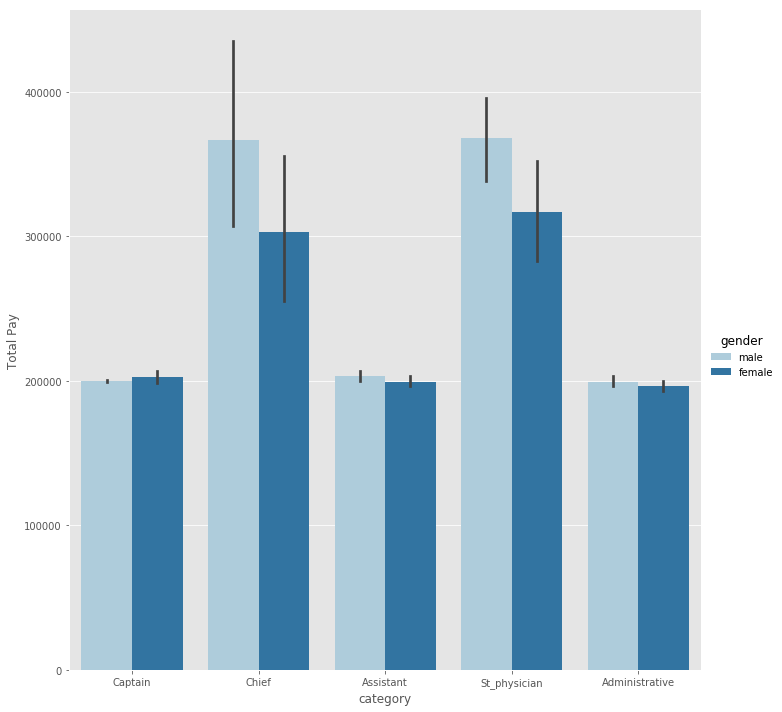

In [39]:
g=sns.catplot(x="category", y="Total Pay", hue="gender", data=df_Cate,
                height=10, kind="bar", palette="Paired")

In [42]:
df_cap_m=df_Cate[(df_Cate['category']=='Captain')& (df_Cate['gender']=='male')]
df_cap_f=df_Cate[(df_Cate['category']=='Captain')& (df_Cate['gender']=='female')]
twosample_results = scipy.stats.ttest_ind(df_cap_m['Total Pay'], df_cap_f['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-captain')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

